<a href="https://colab.research.google.com/github/delishadalu/class-135/blob/main/c135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science** is a field that is used to extract useful
information from data. It follows a **statistical approach** to
retrieve the information and make decisions.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/131.csv')

df.head()

In [ ]:
planet_rows=[]
for index, rows in df.iterrows():
  
  my_list=[rows[1],rows.solar_system_name,rows.planet_mass,rows.planet_radius,rows.planet_type,rows.orbital_radius,rows.orbital_period]
  planet_rows.append(my_list)

planet_rows

In [ ]:
solar_sysytems={}

for planet in planet_rows:
  if solar_sysytems.get(planet[1]):
    solar_sysytems[planet[1]]+=1
  else:
    solar_sysytems[planet[1]]=1

solar_sysytems

In [ ]:
max_solar_sysytem= max(solar_sysytems,key=solar_sysytems.get)
print(max_solar_sysytem, solar_sysytems[max_solar_sysytem])

In [5]:
# planet radius and planet mass- some places its mass or jupiter --> make it uniform

temp_planetros = list(planet_rows)

for planet in temp_planetros:

  planet_mass=planet[2]
  

  if planet_mass.lower() == "unknown" :
    planet_rows.remove(planet)
    continue

  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    
    if planet_mass_ref == "Jupiters":
      planet_mass_value = float(planet_mass_value) * 317.8
    planet[2]=planet_mass_value
      


# for planet radius
  planet_radius=planet[3]
  

  if planet_radius.lower()=="unknown":
    planet_rows.remove(planet)
    continue

  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    

    if planet_radius_ref=="Jupiter":
      planet_radius_value=float(planet_radius_value)*11.2
    planet[3]=planet_radius_value
      
      



In [ ]:
planet_rows


In [ ]:
# get the name of plNETS IN THE MAX SOLAR SYSYTEM

koi_351_planets=[]


for planet in planet_rows:
  
  if max_solar_sysytem == planet[1]:
    koi_351_planets.append(planet)

koi_351_planets


In [ ]:
import plotly.express as px

koi_351_planet_masses = []
koi_351_planet_names = []

for planet_data in koi_351_planets:
  koi_351_planet_masses.append(planet_data[2])
  koi_351_planet_names.append(planet_data[0])

# Adding Earth and its mass 
koi_351_planet_masses.append(1)
koi_351_planet_names.append("Earth")

fig = px.bar(x=koi_351_planet_names, y=koi_351_planet_masses)
fig.show()

In [ ]:


planet_masses = []
planet_radiuses = []
planet_names = []
planet_gravity = []

for planet_data in planet_rows:
  
  
  planet_masses.append(planet_data[2])
  planet_radiuses.append(planet_data[3])
  planet_names.append(planet_data[0])

  gravity = (float(planet_data[2])*5.972e+24) / (float(planet_data[3])*float(planet_data[3])*6371000*6371000) * 6.674e-11
  
  planet_gravity.append(gravity)



fig = px.scatter(x=planet_radiuses, y=planet_masses, size=planet_gravity, hover_data=[planet_names])
fig.show()

In [11]:
temp_planetdata= list(planet_rows)

for planet in temp_planetdata:
  if planet[0].lower()=="hd 100546 b":
    
    planet_rows.remove(planet)

In [ ]:
planet_masses = []
planet_radiuses = []
planet_names = []
planet_gravity = []

for planet_data in planet_rows:
  
  
  planet_masses.append(planet_data[2])
  planet_radiuses.append(planet_data[3])
  planet_names.append(planet_data[0])

  gravity = (float(planet_data[2])*5.972e+24) / (float(planet_data[3])*float(planet_data[3])*6371000*6371000) * 6.674e-11
  
  planet_gravity.append(gravity)



fig = px.scatter(x=planet_radiuses, y=planet_masses, size=planet_gravity, hover_data=[planet_names])
fig.show()

### [c132]

---






.


In [ ]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity): 
  if gravity < 100:
    low_gravity_planets.append(planet_rows[index])

print(len(low_gravity_planets))

In [14]:
# we want to know the planet type of each planet

planettype=[]

for planet in planet_rows:
  planettype.append(planet[4])

print(list(set(planettype)))


['Gas Giant', 'Terrestrial', 'Super Earth', 'Neptune-like']


In [ ]:
# calculate the number of clusters... x: planet radius , y:planet mass

planet_mass=[]
planet_radius=[]
planet_type=[]



for planet in low_gravity_planets:
  planet_mass.append(planet[2])
  planet_radius.append(planet[3])
  planet_type.append(planet[4])

fig=px.scatter(x=planet_radius,y=planet_mass,color=planet_type)
fig.show()

In [16]:
#s select the x data

x=[]

for planet in low_gravity_planets:
  temp_list=[planet[3],planet[2]] # planet_radius and planet_mass
  x.append(temp_list)

Text(0, 0.5, 'WCSS')

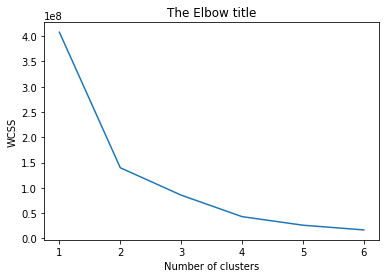

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [18]:
# planet types=4, but when we looked at the scatter plot, we couldn’t detect the number of clear clusters.

# That’s the power of machine learning!

# Out of the 4 types of planets that we studied, which are the ones that can support life?
# Terrestrial & Super-Earth

siutable_planets=[]

for planet in low_gravity_planets:
  if planet[4].lower()=="terrestrial" or planet[4].lower()=="super earth":
    siutable_planets.append(planet)

print(len(siutable_planets))


1452


In [ ]:
# are these the only factor needed to survive on planets..>???
# speed of the planet...!!

**c133**

.



In [19]:
# remove orbital radius that are unknown
temp_siutable_planets= list(siutable_planets)

for planets in temp_siutable_planets:
  if planets[5].lower() == "unknown":
    siutable_planets.remove(planets)
    
  


# orbital_period -- convert to days

for planets in siutable_planets:
  if planets[6].split(" ")[1].lower() == "days":
    planets[6]= float(planets[6].split(" ")[0])

  else:
    planets[6]= float(planets[6].split(" ")[0])* 365

  planets[5]= float(planets[5].split(" ")[0])
  

  
  

  



In [ ]:
# draw scatter graph between orbital radius and orbital period

orbital_radius=[]
orbital_period=[]

for planets in siutable_planets:
  
  orbital_radius.append(planets[5])
  orbital_period.append(planets[6])

fig=px.scatter(x=orbital_radius, y=orbital_period)
fig.show()

In [21]:
# remove planets which have orbital radius less than 0.33 and greater than 2

goldilock_planets = list(siutable_planets) #We will leave suitable planet list as it is

temp_goldilock_planets = list(siutable_planets) 
for planet_data in temp_goldilock_planets:
  if planet_data[5] < 0.38 or planet_data[5] > 2:
    goldilock_planets.remove(planet_data)

print(len(siutable_planets))
print(len(goldilock_planets))

696
25


In [22]:
planet_speeds = []

for planet_data in siutable_planets:
  distance = 2 * 3.14 * (planet_data[5] * 1.496e+8) # orbital radius
  time = planet_data[6] * 86400 # orbital period

  speed = distance / time

  

  planet_speeds.append(speed)

In [23]:
# remove the planets which are having speed greater than 200

speed_supporting_planets = list(siutable_planets) 

temp_speed_planets = list(siutable_planets)

for index, planet_data in enumerate(temp_speed_planets):
  if planet_speeds[index] > 200:
    speed_supporting_planets.remove(planet_data)

print(len(speed_supporting_planets))

676


 25 planets that have the right planet_type, orbital radius, gravity

 There are 676 planets at the right speed to support us!

**c134...**




.


.



In [24]:
habitable_planets=[]

for planet in speed_supporting_planets:
  if planet in goldilock_planets:
    habitable_planets.append(planet)

len(habitable_planets)

25

In [ ]:
# filter the planet that have low gravity only and nothing else

final_dict={}

for index, planet in enumerate(planet_rows):
  feature_list=[]


# gravity
  gravity = (float(planet[2])*5.972e+24) / (float(planet[3])*float(planet[3])*6371000*6371000) * 6.674e-11
  try:
    if gravity<100:
      feature_list.append("gravity")
  except: pass

#planet type
  try:
    if planet[4].lower()=="terrestrial" or planet[4].lower()=="super earth":
      feature_list.append("planet_type")
  except: pass

#goldilock planet
  try:
    print(planet[5])
    if planet[5] > 0.38 or planet[5] < 2:
      feature_list.append("goldilock")
  except: pass

#planet speed
  try:
    distance = 2 * 3.14 * (planet[5] * 1.496e+8) # orbital radius
    time = planet[6] * 86400 # orbital period
    speed = distance / time

    if speed<200:
      feature_list.append("speed")
  except: pass

  final_dict[index]=(feature_list)

print(final_dict)


In [26]:
# check how many planets have low gravity planets
gravity_planet_count= 0
for key,value in final_dict.items():
  if "gravity" in value:
    gravity_planet_count+=1

gravity_planet_count

3951

In [27]:
planettype_count= 0
for key,value in final_dict.items():
  if "planet_type" in value:
    planettype_count+=1

planettype_count

1485

In [28]:
# last time remeber we had planet type has 1452(including low gravity planets)
# that means there are 33 planets that are planet type but not low gravity,filter them

not_lowgravity_planet=[]

for planet in planet_rows:
  if planet not in low_gravity_planets:
    not_lowgravity_planet.append(planet)

len(not_lowgravity_planet)

299

In [29]:
# filter the ones which are habitual planet types
type_no_gravity_planet_count=0
for planet in not_lowgravity_planet:
  if planet[4].lower()=="terrestrial" or planet[4].lower()=="super earth":
    type_no_gravity_planet_count+=1

type_no_gravity_planet_count

33

In [30]:
#similiarly check how many goldilick planets and speed supporting planets

goldilock_count= 0
for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_count+=1

goldilock_count

696

In [31]:
speed_count= 0
for key,value in final_dict.items():
  if "speed" in value:
    speed_count+=1

speed_count

676

c135.....



In [ ]:
# copy paste

final_dict={}

for index, planet in enumerate(planet_rows):
  feature_list=[]


# gravity
  gravity = (float(planet[2])*5.972e+24) / (float(planet[3])*float(planet[3])*6371000*6371000) * 6.674e-11
  try:
    if gravity<100:
      feature_list.append("gravity")
  except: pass

#planet type
  try:
    if planet[4].lower()=="terrestrial" or planet[4].lower()=="super earth":
      feature_list.append("planet_type")
  except: pass

#goldilock planet
  try:
    
    if float(planet[5].split(" ")[0]) > 0.38 and float(planet[5].split(" ")[0]) < 2:
      feature_list.append("goldilock")
  except: pass

#planet speed
  try:
    try:
      distance = 2 * 3.14 * (float(planet[5].split(" ")[0]) * 1.496e+9)
    except:
      try:
        distance = 2 * 3.14 * (float(planet[5]) * 1.496e+9)
      except: pass
    try:
      time, unit = planet[6].split(" ")[0], planet[6].split(" ")[1]
      if unit.lower() == "days":
        time = float(time)
      else:
        time = float(time) * 365
    except:
      time = planet[6]
    time = time * 86400
    speed = distance / time
    if speed < 200:
      
      feature_list.append("speed")
  except: pass
  
  final_dict[planet[0]]=(feature_list)

print(final_dict)